In [1]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [53]:
import seaborn as sns

In [2]:
import nlp, wrangle

/usr/local/anaconda3/lib/python3.7/site-packages/nltk/decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
/usr/local/anaconda3/lib/python3.7/site-packages/nltk/lm/counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, defaultdict
/usr/local/anaconda3/lib/python3.7/site-packages/nltk/lm/vocabulary.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Counter, Iterable


In [35]:
import numpy as np

In [37]:
import pandas as pd

In [3]:
df = wrangle.wrangle_data()

In [75]:
test_drive = df.recommendations.dropna()

In [54]:
sentiments = nlp.create_sentiment_df(test_drive)

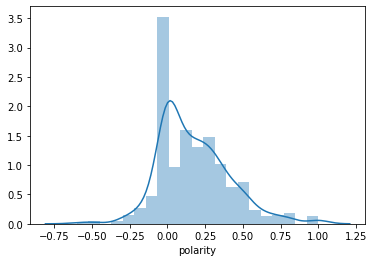

In [57]:
sns.distplot(sentiments.polarity)

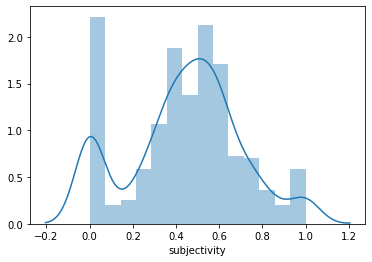

In [58]:
sns.distplot(sentiments.subjectivity)

In [7]:
doc_term_matrix, count_vect = nlp.create_wordcount_matrix(test_drive)

In [13]:
from sklearn.decomposition import LatentDirichletAllocation, NMF

In [18]:
lda_tf = LatentDirichletAllocation(n_components=5, random_state=0)

In [19]:
lda_tf.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [20]:
pyLDAvis.sklearn.prepare(lda_tf, doc_term_matrix, count_vect)

/usr/local/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.015434  0.084195       1        1  22.609726
3     -0.044466 -0.062280       2        1  20.750092
2      0.124118 -0.044642       3        1  20.361627
0      0.010212  0.068081       4        1  20.109896
4     -0.074430 -0.045355       5        1  16.168659, topic_info=     Category        Freq       Term       Total  loglift  logprob
376   Default   40.000000       good   40.000000  30.0000  30.0000
774   Default  204.000000   research  204.000000  29.0000  29.0000
304   Default   25.000000     events   25.000000  28.0000  28.0000
990   Default   29.000000         ux   29.000000  27.0000  27.0000
257   Default   28.000000  different   28.000000  26.0000  26.0000
...       ...         ...        ...         ...      ...      ...
303    Topic5    6.977923      event   31.356628   0.3194  -5.1216
275    Topic5    9.018341        don   95.142702  -0.5340  -4.8651
913    Topic5    7.570208      talks   51.609437  -0.0974  -5.0401
1042   Topic5    6.595238  workshops   37.530733   0.0833  -5.1780
482    Topic5    5.755486       just   60.335103  -0.5277  -5.3142

[379 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2         2  0.853402     20
7         1  0.076689   able
7         2  0.230067   able
7         4  0.230067   able
7         5  0.460134   able
...     ...       ...    ...
1043      4  0.156755  world
1043      5  0.365761  world
1045      4  0.860262  worth
1050      4  0.764653    www
1053      3  0.919073    yes

[663 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1, 5])

In [ ]:
#H is the 

In [26]:
def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print(f"Topic {topic_idx}: ")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(documents[doc_index])

In [42]:
for topic_idx, topic in enumerate(lda_H):
    print(f"Topic {topic_idx}: ")
#    print(" ".join[])
    print(topic)

Topic 0: 
[1.19514865 1.20072482 0.20000291 ... 4.19972791 0.20001917 0.20000406]
Topic 1: 
[1.19998994 1.19925366 0.20000229 ... 3.88802964 0.20206477 0.20000368]
Topic 2: 
[1.19991496 0.20000671 0.20000345 ... 2.61884509 4.19787369 2.19369421]
Topic 3: 
[0.20494258 0.20000665 3.19998821 ... 2.09339157 0.20001879 0.20629295]
Topic 4: 
[0.20000388 0.20000815 0.20000314 ... 0.2000058  0.20002357 0.20000511]


# H, Word:Topic Matrix

In [45]:
len(lda_H)

5

In [48]:
lda_H.shape

(5, 1055)

In [46]:
len(lda_H[0])

1055

In [27]:
no_topics = 5

In [81]:
no_top_words = 5
no_top_documents = 5

# W, Document:Topic Matrix

In [49]:
type(lda_W)

numpy.ndarray

## FIX IT

In [183]:
def find_top_documents_per_topic(lda_W, documents):
    df_W = pd.DataFrame(lda_W, index=documents.index)
    indeces = df_W.idxmax(axis=0)
    counter = 0
    for i in indeces:
        print(f'Top Document for Topic {counter}: \n')
        print(documents[i] + '\n')
        counter += 1

In [184]:
find_top_documents_per_topic(lda_W, test_drive)

Top Document for Topic 0: 

Instead of trying to create a general ideal conference for the masses, consider having a more focused theme with a message / goal for the target audience. 

Top Document for Topic 1: 

My goal is to provide constructive criticism, so apologies in advance for being blunt. I hope you can use it to succeed in your hypothetical plans. I've been bugged from end to end with the anchors you chose to use in your survey.
I have no idea how you're going to understand the data you've collected, especially since I have no idea how i was supposed understand the question. What does neutral do in the middle? Why is something at best somewhat important, but can't be slightly important? I may be picky and perfectionist, but it bothers me a lot. So hypothetically, if you were to organise a conference on research, my advice would be to start by gaining credibility in the field. As someone who's never heard the name before, I don't know who you are, why you care and this survey

In [132]:
x = pd.DataFrame(lda_W, index=test_drive.index)

In [165]:
top_docs_indeces = x.idxmax(axis=0)

In [169]:
for i in top_docs_indeces:
    print(i)

74
136
742
307
342


In [135]:
test_drive[136]

"My goal is to provide constructive criticism, so apologies in advance for being blunt. I hope you can use it to succeed in your hypothetical plans. I've been bugged from end to end with the anchors you chose to use in your survey.\nI have no idea how you're going to understand the data you've collected, especially since I have no idea how i was supposed understand the question. What does neutral do in the middle? Why is something at best somewhat important, but can't be slightly important? I may be picky and perfectionist, but it bothers me a lot. So hypothetically, if you were to organise a conference on research, my advice would be to start by gaining credibility in the field. As someone who's never heard the name before, I don't know who you are, why you care and this survey doesn't seem to indicate you're an expert in the field, unfortunately - despite thanking people for proof-reading / pilot testing this survey... "

In [125]:
test_drive.iloc[284]

'Mix of theory and heavy on practical, mixing talk lengths/formats could cover a lot of area and balance those nicely. \n\n(hi all!)'